# Section 1: Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis 
for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled 
wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock 
belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona 
pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come 
up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, 
and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine
situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs 
once the situation gets better all around and stand out from other service providers and make huge profits.They have contracted
a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to 
understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:Which variables 
are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands based on various meteorological surveys and people's styles, the service provider 
firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


 

# Section 2: Business Goal
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand 
how exactly the demands vary with different features.They can accordingly manipulate the business strategy to meet the demand 
levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand 
dynamics of a new market.

Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================

# Section 3: Reading and Understanding the Data


In [132]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sweetviz as sv
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

#Setting option to diaply maximum rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [188]:
#Checking the version of the libraries
#Panda's version
print(pd.__version__)
#Numpy's version
print(np.__version__)
#Seaborn's version
print(sns.__version__)
#Sweetviz's version
print(sv.__version__)

1.2.4
1.20.1
0.11.1
2.1.3


In [189]:
df_bike_share = pd.read_csv("day.csv")

In [190]:
# Check the head of the dataset
df_bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [191]:
# Check the descriptive information
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [192]:
df_bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [193]:
# Check the shape of df

print(df_bike_share.shape)

(731, 16)


### Finding : 
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type. 

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

In [194]:
df_bike_share.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [195]:
# percentage of missing values in each column

round((df_bike_share.isnull().sum()/len(df_bike_sharing)*100), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Finding
There are no missing / Null values either in columns or rows

In [196]:
# Checking for duplicates 
df_bike_share.duplicated().sum()

0

In [197]:
# checking for number of unique values 
df_bike_share.duplicated().nunique()

1

#  EXPLORATORY DATA ANALYSIS / DATA CLEANING

In [198]:
#Creating a copy of the data frame
df_bike_sharing = df_bike_share.copy()

In [199]:
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [200]:
'''
Removing redundant & unwanted columns
instant : Its only an index value
dteday :  This has the date, Since we already have seperate columns for 'year' & 'month'.
          hence, we could live without this column.
casual & registered : Both these columns contains the count of bike booked by different categories of customers.
                      Moreover, Count=casual+registered

'''
df_bike_sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [201]:
# Convert to 'object' data type

df_bike_sharing['season']=df_bike_sharing['season'].astype('object')
df_bike_sharing['weathersit']=df_bike_sharing['weathersit'].astype('object')
df_bike_sharing['mnth']=df_bike_sharing['mnth'].astype('object')
df_bike_sharing['weekday']=df_bike_sharing['weekday'].astype('object')
df_bike_sharing['holiday']=df_bike_sharing['holiday'].astype('object')
df_bike_sharing['workingday']=df_bike_sharing['workingday'].astype('object')

In [202]:
# Renaming the variables with meaningful names.
df_bike_sharing.rename(columns={'temp':'temperature_actual','atemp':'temperature_felt','weathersit':'weather_condition',
                                'workingday':'working_day','hum':'humidity','mnth':'month','cnt':'count_rental_bikes',
                                'yr':'year'},inplace=True)

In [203]:
#Mapping the values of the categorical and numerical variabels with meaningful values.
df_bike_sharing['working_day']=df_bike_sharing['working_day'].map({0:'not_workingday',1:'yes_workingday'})

df_bike_sharing['holiday']=df_bike_sharing['holiday'].map({0:'not_holiday',1:'yes_holiday'})

df_bike_sharing['month'] = df_bike_sharing['month'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 
                                   9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

df_bike_sharing['weather_condition'] = df_bike_sharing['weather_condition'].map({1:"Clear", 2:"Cloudy", 3:"Light Rain", 4:"Heavy Rain"})

df_bike_sharing['season'] = df_bike_sharing['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

df_bike_sharing['weekday'] = df_bike_sharing['weekday'].map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
df_bike_sharing['year']=df_bike_sharing['year'].map({0:'2018',1:'2019'})

## Visualising Variables and their relationship with other variables


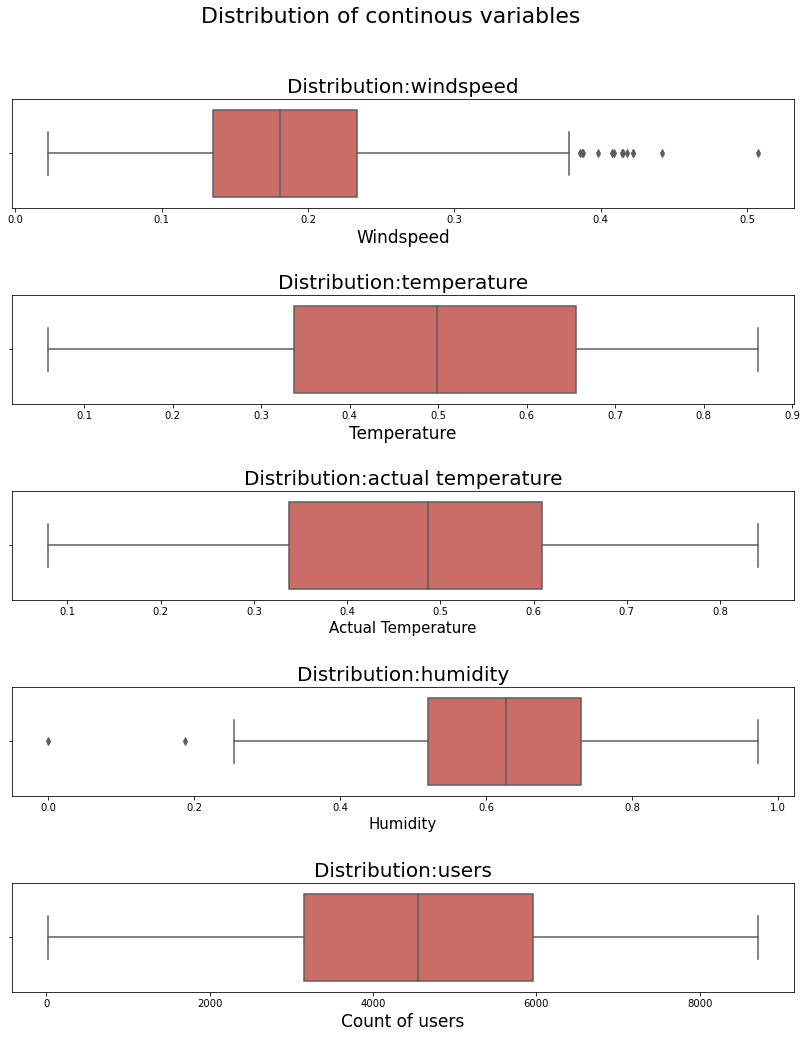

In [204]:
#Plotting the continous variables to understand the distribution and descriptive stats.

plt.figure(figsize=(14,16))

plt.suptitle('Distribution of continous variables', fontsize=22)

plt.subplot(511)
g = sns.boxplot( x='windspeed', data=df_bike_sharing,palette="hls")
g.set_xlabel("Windspeed", fontsize=17)
g.set_title("Distribution:windspeed", fontsize=20)

plt.subplot(512)
g1 = sns.boxplot( x="temperature_actual",data=df_bike_sharing, palette = "hls")
g1.set_xlabel("Temperature", fontsize=17)
g1.set_title("Distribution:temperature", fontsize=20)

plt.subplot(513)
g2 = sns.boxplot(x="temperature_felt", data=df_bike_sharing,palette="hls")
g2.set_xlabel("Actual Temperature", fontsize=15)
g2.set_title("Distribution:actual temperature", fontsize=20)

plt.subplot(514)
g3 = sns.boxplot(x="humidity", data=df_bike_sharing,palette="hls")
g3.set_xlabel("Humidity", fontsize=15)
g3.set_title("Distribution:humidity", fontsize=20)

plt.subplot(515)
g4 = sns.boxplot( x='count_rental_bikes', data=df_bike_sharing,palette="hls")
g4.set_xlabel("Count of users", fontsize=17)
g4.set_title("Distribution:users", fontsize=20)



plt.subplots_adjust(hspace = 0.8,top = 0.9)

plt.show()

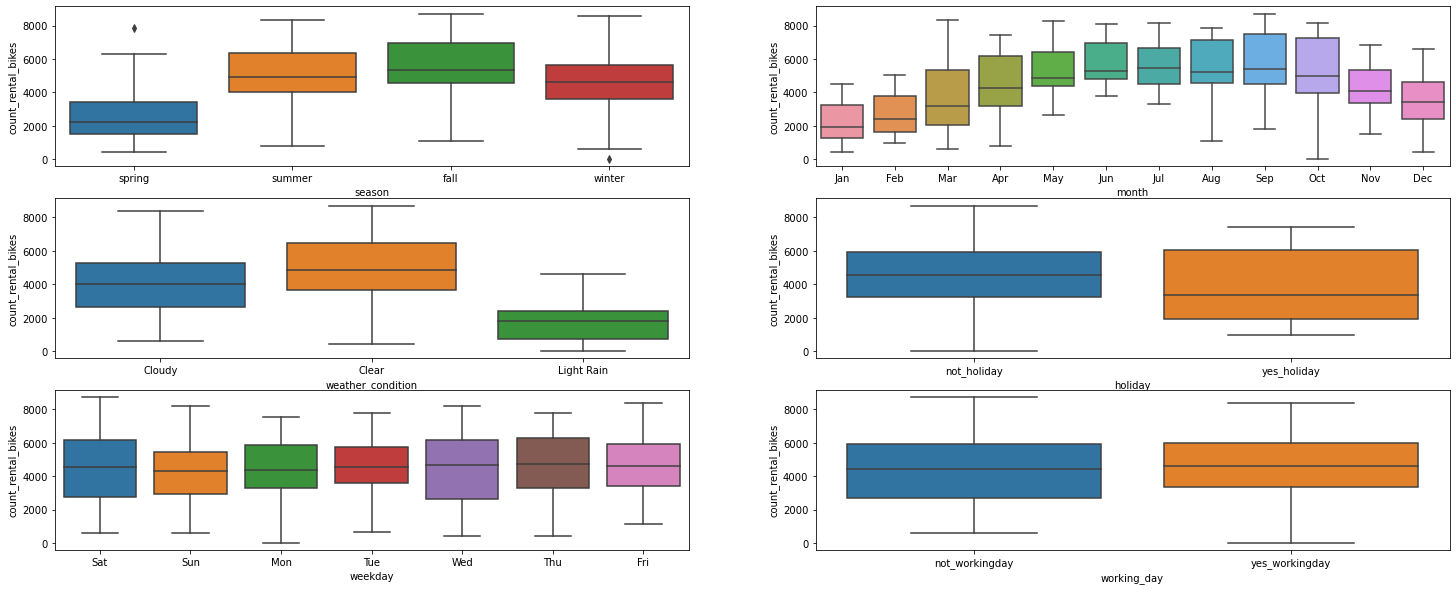

In [205]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'count_rental_bikes',  data = df_bike_sharing)
plt.subplot(3,2,2)
sns.boxplot(x = 'month', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,3)
sns.boxplot(x = 'weather_condition', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,6)
sns.boxplot(x = 'working_day', y = 'count_rental_bikes', data = df_bike_sharing)
plt.show()

### Insights
There were 6 categorical variables in the dataset. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 

The inference that We could derive were: 
- **season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

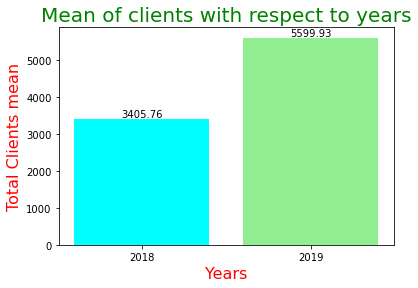

In [206]:
y=df_bike_sharing.groupby("year")['count_rental_bikes'].mean()
x=df_bike_sharing.groupby("year")['count_rental_bikes'].mean().index
chart=plt.bar(x,y,color=['cyan','lightgreen'])
xticks=[0,1]
plt.xticks(xticks,['2018','2019'])
plt.title("Mean of clients with respect to years",fontdict={'fontsize':20,'color':'Green'})
plt.xlabel("Years",fontdict={'fontsize':16,'color':'Red'})
plt.ylabel("Total Clients mean",fontdict={'fontsize':16,'color':'Red'})
for rect in chart:
    plt.annotate(round(rect.get_height(),2),
                 xy=(rect.get_x()+rect.get_width()/2,rect.get_height())
                 ,textcoords='data'
                ,va='bottom'
                ,ha='center')
plt.show()
#Observation-: we can see there is a huge boost in the demand or total clients in 2019 in comparision to 2018, which can be a sign of increasing popularity of the brand.

<AxesSubplot:xlabel='month', ylabel='count_rental_bikes'>

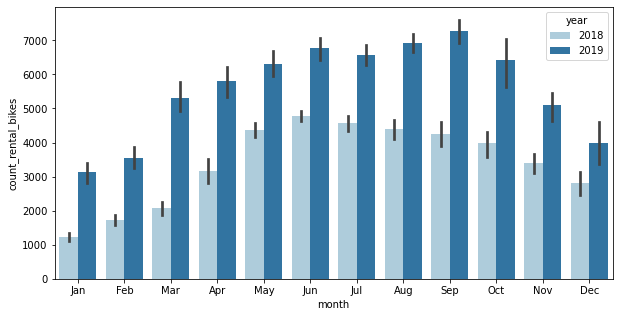

In [250]:
plt.figure(figsize=(10,5))
sns.barplot('month','count_rental_bikes',hue='year',data=df_bike_sharing,palette='Paired')

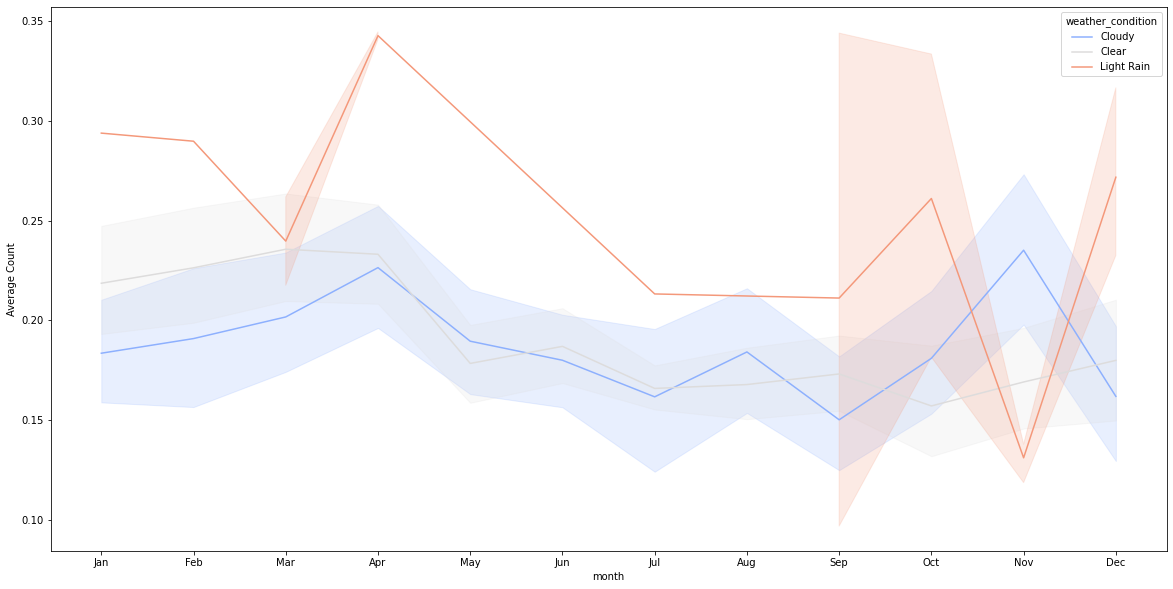

In [268]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'month', y = 'windspeed', data = df_bike_sharing, estimator = np.average, hue = 'weather_condition', palette = 'coolwarm')
plt.ylabel('Average Count')
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='count_rental_bikes'>

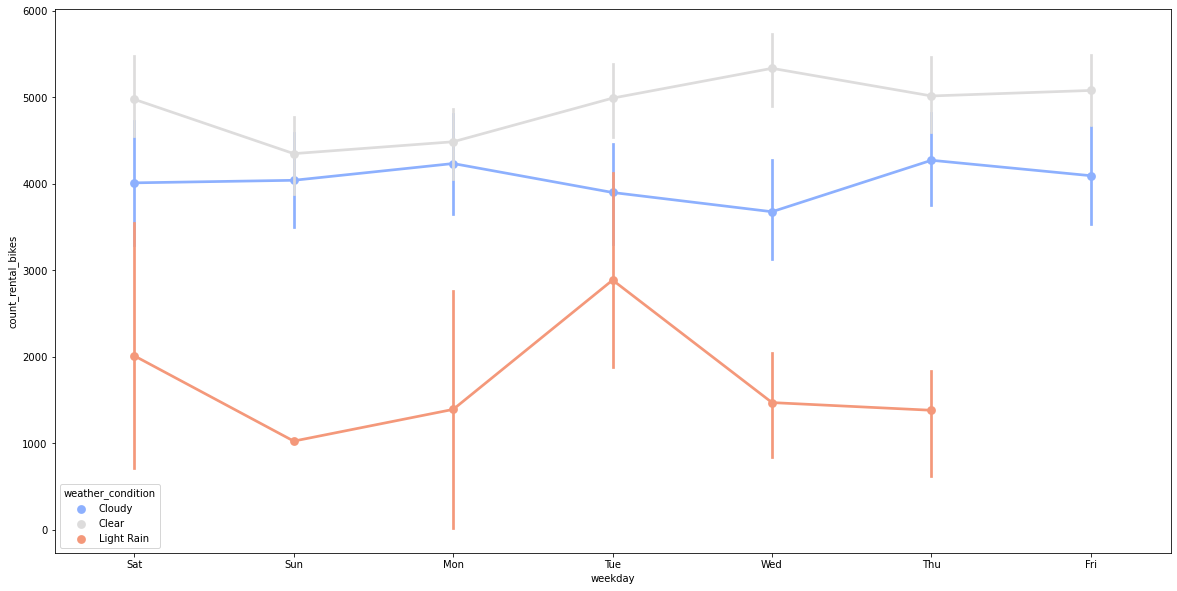

In [264]:
plt.figure(figsize = (20,10))
sns.pointplot(x = 'weekday', y = 'count_rental_bikes', data = df_bike_sharing, estimator=np.average, hue = 'weather_condition', palette='coolwarm')

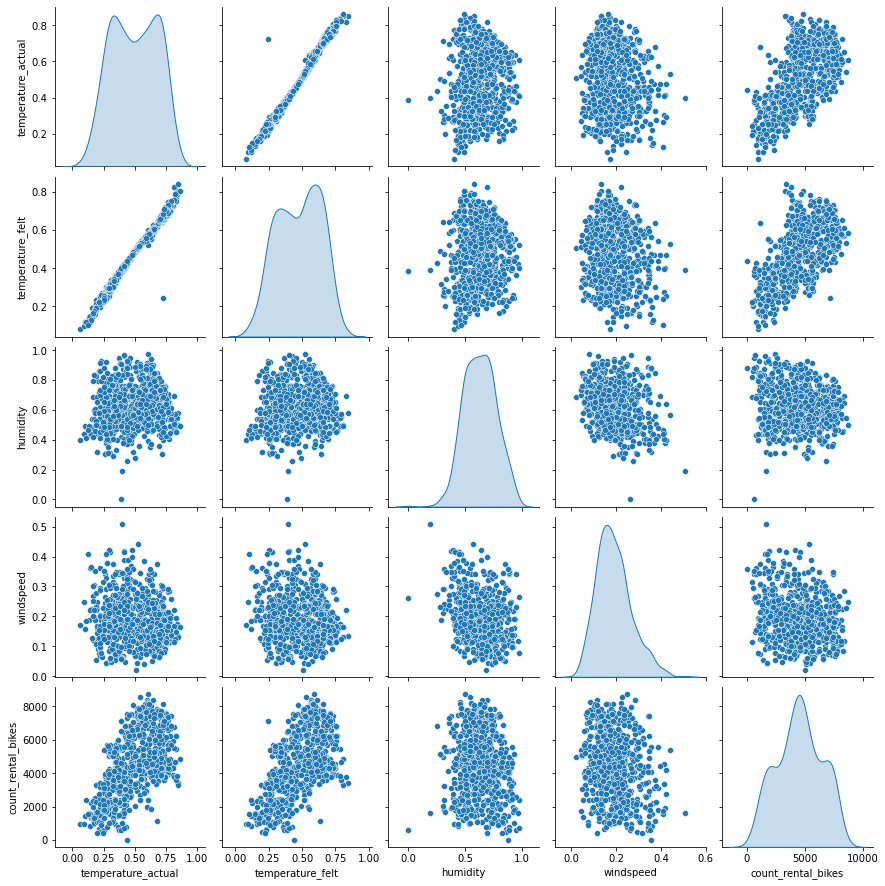

In [207]:
# Create a new dataframe of only numeric variables:

bike_num_features=df_bike_sharing[[ 'temperature_actual', 'temperature_felt', 'humidity', 'windspeed','count_rental_bikes']]

sns.pairplot(bike_num_feat, diag_kind='kde')
plt.show()

## Correlation Matrix

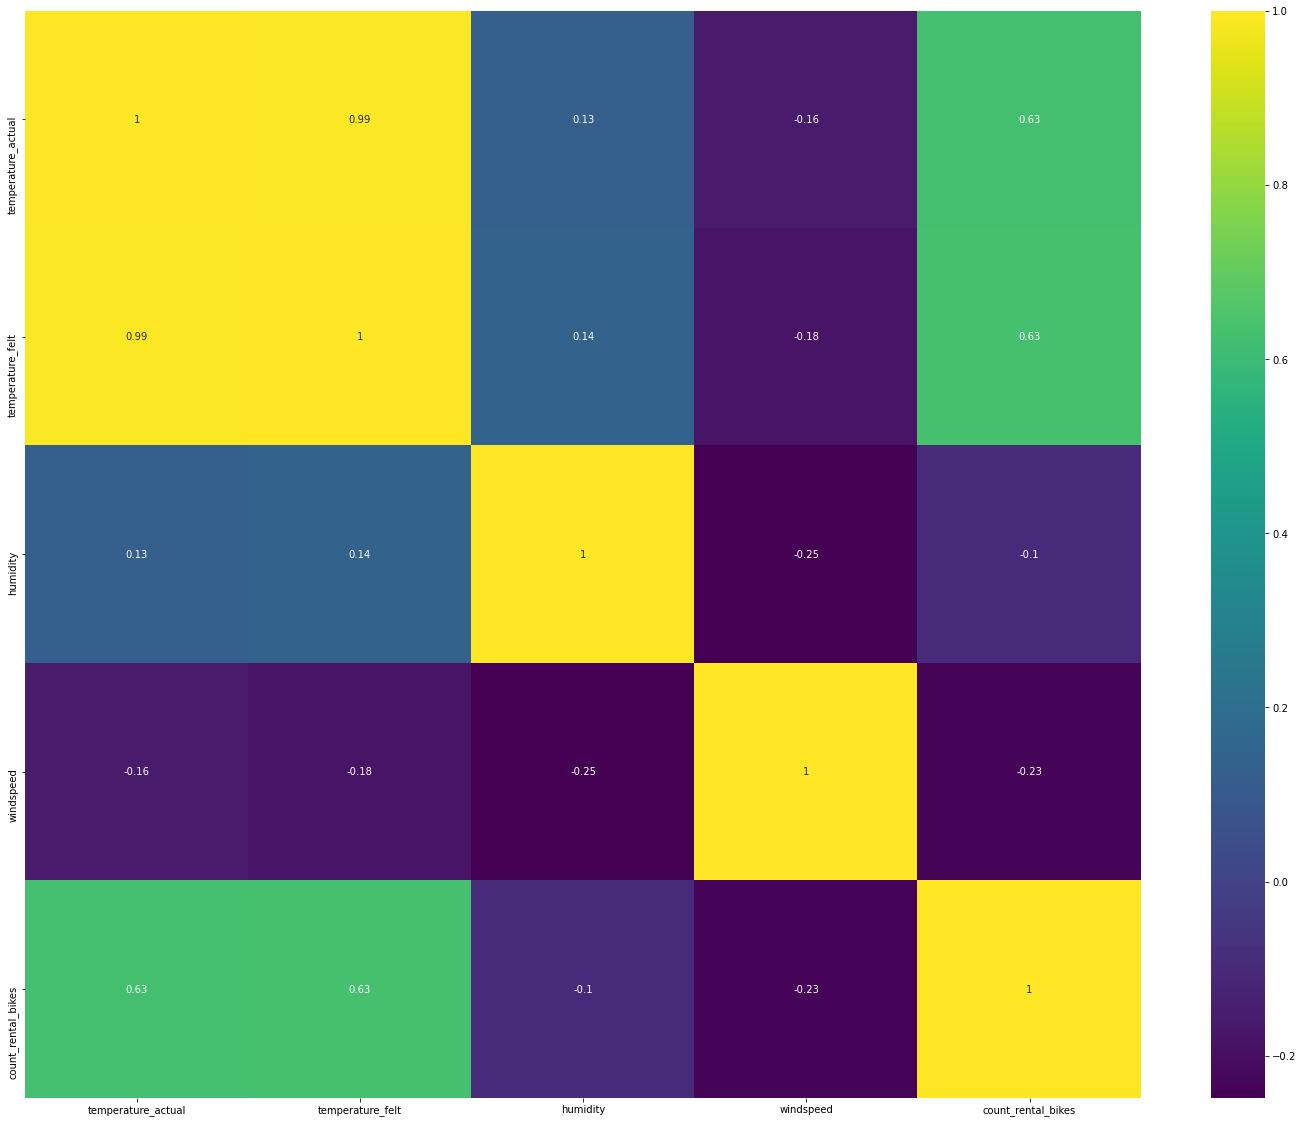

In [208]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_num_features.corr(), annot = True, cmap="viridis")
plt.show()

### Insights:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

In [178]:
df_bike_sharing.head(5)

,season,year,month,holiday,weekday,working_day,weather_condition,temperature_actual,temperature_felt,humidity,windspeed,count_rental_bikes
0,spring,2018,Jan,not_holiday,Sat,not_workingday,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,spring,2018,Jan,not_holiday,Sun,not_workingday,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,spring,2018,Jan,not_holiday,Mon,yes_workingday,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,spring,2018,Jan,not_holiday,Tue,yes_workingday,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,spring,2018,Jan,not_holiday,Wed,yes_workingday,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [209]:
#temperature_actual and temperature_felt have very high correlation of 0.99. hence, temperature_felt will be dropped
df_bike_sharing.drop(['temperature_felt'],axis=1,inplace=True)

In [210]:
# Creating Dummy variable for categorical and numerical variables.
df_bike_sharing_dummies = pd.get_dummies(df_bike_sharing, drop_first=True)
df_bike_sharing_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temperature_actual            731 non-null    float64
 1   humidity                      731 non-null    float64
 2   windspeed                     731 non-null    float64
 3   count_rental_bikes            731 non-null    int64  
 4   season_spring                 731 non-null    uint8  
 5   season_summer                 731 non-null    uint8  
 6   season_winter                 731 non-null    uint8  
 7   year_2019                     731 non-null    uint8  
 8   month_Aug                     731 non-null    uint8  
 9   month_Dec                     731 non-null    uint8  
 10  month_Feb                     731 non-null    uint8  
 11  month_Jan                     731 non-null    uint8  
 12  month_Jul                     731 non-null    uint8  
 13  month

In [211]:
#Splitting the dataset into Test and Train
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
#printing the shape of the train and test datasets.
np.random.seed(0)
df_train,df_test= train_test_split(df_bike_sharing_dummies,train_size = 0.70, random_state = 0)
print("df_train ",df_train.shape)
print("df_test ",df_test.shape)


df_train  (511, 29)
df_test  (220, 29)


# RESCALING THE FEATURES

In [212]:
#Creating an instance : scaler for MinMaxScaler
scaler = MinMaxScaler()

In [213]:
# Apply scaler to all the continous variables
num_feats=[ 'humidity','temperature_actual','windspeed','count_rental_bikes']
df_train[num_feats]= scaler.fit_transform(df_train[num_feats])
df_train.head()

,temperature_actual,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,working_day_yes_workingday,weather_condition_Cloudy,weather_condition_Light Rain
524,0.734271,0.275719,0.350234,0.904020,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12,0.090983,0.279307,0.680831,0.162194,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
161,0.835026,0.543660,0.296196,0.579398,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
556,0.829489,0.562201,0.288003,0.734560,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
502,0.660087,0.350479,0.492593,0.862768,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


### Feature Selection using Recursive feature elimination:

In [214]:
#Splitting the train dataset into Explanatory variables: X_train and Target variable: y_train
y_train=df_train.pop('count_rental_bikes')
X_train=df_train

In [215]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [216]:
#Importing statsmodels
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [217]:
#View the summary of the regression
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     count_rental_bikes   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     92.55
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          6.85e-172
Time:                        02:37:35   Log-Likelihood:                 509.45
No. Observations:                 511   AIC:                            -962.9
Df Residuals:                     483   BIC:                            -844.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2902      0.033      8.729      0.000       0.225       0.356
temperature_actual               0.4293      0.046      9.432      0.000       0.340       0.519
humidity                        -0.1510      0.031     -4.864      0.000      -0.212      -0.090
windspeed                       -0.1510      0.022     -6.743      0.000      -0.195      -0.107
season_spring                   -0.1179      0.031     -3.815      0.000      -0.179      -0.057
season_summer                   -0.0149      0.025     -0.587      0.557      -0.065       0.035
season_winter                    0.0642      0.030      2.160      0.031       0.006       0.123
year_2019                        0.2243      0.008     26.512      0.000       0.208       0.241
month_Aug                       -0.0296      0.034     -0.865      0.387      -0.097       0.038
month_Dec                       -0.0461      0.035     -1.322      0.187      -0.115       0.022
month_Feb                       -0.0238      0.033     -0.712      0.477      -0.089       0.042
month_Jan                       -0.0373      0.034     -1.085      0.279      -0.105       0.030
month_Jul                       -0.0762      0.035     -2.150      0.032      -0.146      -0.007
month_Jun                       -0.0295      0.026     -1.143      0.254      -0.080       0.021
month_Mar                        0.0220      0.026      0.858      0.391      -0.028       0.072
month_May                        0.0332      0.021      1.570      0.117      -0.008       0.075
month_Nov                       -0.0629      0.038     -1.659      0.098      -0.137       0.012
month_Oct                        0.0181      0.037      0.490      0.624      -0.055       0.091
month_Sep                        0.0530      0.032      1.651      0.099      -0.010       0.116
holiday_yes_holiday              0.0478      0.023      2.122      0.034       0.004       0.092
weekday_Mon                     -0.0258      0.016     -1.624      0.105      -0.057       0.005
weekday_Sat                      0.0919      0.014      6.637      0.000       0.065       0.119
weekday_Sun                      0.0589      0.014      4.325      0.000       0.032       0.086
weekday_Thu                      0.0013      0.016      0.081      0.935      -0.029       0.032
weekday_Tue                     -0.0112      0.015     -0.737      0.461      -0.041       0.019
weekday_Wed                     -0.0073      0.015     -0.472      0.637      -0.038       0.023
working_day_yes_workingday       0.0916      0.012      7.589      0.000       0.068       0.115
weather_condition_Cloudy        -0.0377      0.011     -3.370      0.001      -0.060      -0.016
weather_condition_Light Rain    -0.2083      0.031     -6.674      0.000    

In [221]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [222]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temperature_actual', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 2),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 2),
 ('month_Mar', False, 2),
 ('month_May', True, 1),
 ('month_Nov', True, 1),
 ('month_Oct', False, 2),
 ('month_Sep', True, 1),
 ('holiday_yes_holiday', False, 2),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 2),
 ('weekday_Thu', False, 2),
 ('weekday_Tue', False, 2),
 ('weekday_Wed', False, 2),
 ('working_day_yes_workingday', False, 2),
 ('weather_condition_Cloudy', True, 1),
 ('weather_condition_Light Rain', True, 1)]

In [223]:
col = X_train.columns[rfe.support_]
col

Index(['temperature_actual', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'year_2019', 'month_Dec', 'month_Jan', 'month_Jul',
       'month_May', 'month_Nov', 'month_Sep', 'weather_condition_Cloudy',
       'weather_condition_Light Rain'],
      dtype='object')

In [224]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'month_Aug', 'month_Feb', 'month_Jun', 'month_Mar',
       'month_Oct', 'holiday_yes_holiday', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'working_day_yes_workingday'],
      dtype='object')

In [225]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF Check

In [226]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,humidity,13.06
0,temperature_actual,10.37
2,windspeed,4.03
4,season_winter,2.87
3,season_spring,2.74
12,weather_condition_Cloudy,2.45
5,year_2019,2.09
10,month_Nov,1.83
7,month_Jan,1.65
6,month_Dec,1.49


In [228]:

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model after RFE
lr1 = sm.OLS(y_train, X_train_lm1).fit()
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:     count_rental_bikes   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          7.15e-181
Time:                        02:40:35   Log-Likelihood:                 497.97
No. Observations:                 511   AIC:                            -965.9
Df Residuals:                     496   BIC:                            -902.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Model 2

- Removing the variable 'Humidity' based on its High VIF

In [230]:
X_train_model_2 = X_train_rfe.drop(["humidity"], axis = 1)

### VIF Check

In [231]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_2.values, i) for i in range(X_train_model_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature_actual,4.84
1,windspeed,3.99
3,season_winter,2.59
2,season_spring,2.37
4,year_2019,2.06
9,month_Nov,1.80
6,month_Jan,1.62
11,weather_condition_Cloudy,1.53
5,month_Dec,1.46
7,month_Jul,1.44


In [232]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_model_2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:     count_rental_bikes   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     176.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          8.57e-177
Time:                        02:44:14   Log-Likelihood:                 485.55
No. Observations:                 511   AIC:                            -943.1
Df Residuals:                     497   BIC:                            -883.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Model 3

 - Removing the variable 'hum' based on its Very High 'VIF' value.
 - Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [233]:
X_train_model_3 = X_train_model_2.drop(["month_May"], axis = 1)

### VIF Check

In [234]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_3.values, i) for i in range(X_train_model_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature_actual,4.46
1,windspeed,3.99
3,season_winter,2.52
2,season_spring,2.32
4,year_2019,2.05
8,month_Nov,1.80
6,month_Jan,1.61
10,weather_condition_Cloudy,1.51
5,month_Dec,1.46
7,month_Jul,1.36


In [235]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_model_3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:     count_rental_bikes   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.00e-177
Time:                        02:45:30   Log-Likelihood:                 484.32
No. Observations:                 511   AIC:                            -942.6
Df Residuals:                     498   BIC:                            -887.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr3 model coefficient values

In [284]:
model_lm3_coeff=pd.DataFrame(lr3.params,columns=['coefficient_values'])
print(model_lm3_coeff.T)

                       const  temperature_actual  windspeed  season_spring  \
coefficient_values  0.314092            0.371059   -0.11721       -0.11886   

                    season_winter  year_2019  month_Dec  month_Jan  month_Jul  \
coefficient_values       0.074944   0.232119  -0.055825  -0.042903  -0.048696   

                    month_Nov  month_Sep  weather_condition_Cloudy  \
coefficient_values  -0.077509   0.050736                 -0.067358   

                    weather_condition_Light Rain  
coefficient_values                     -0.280476  


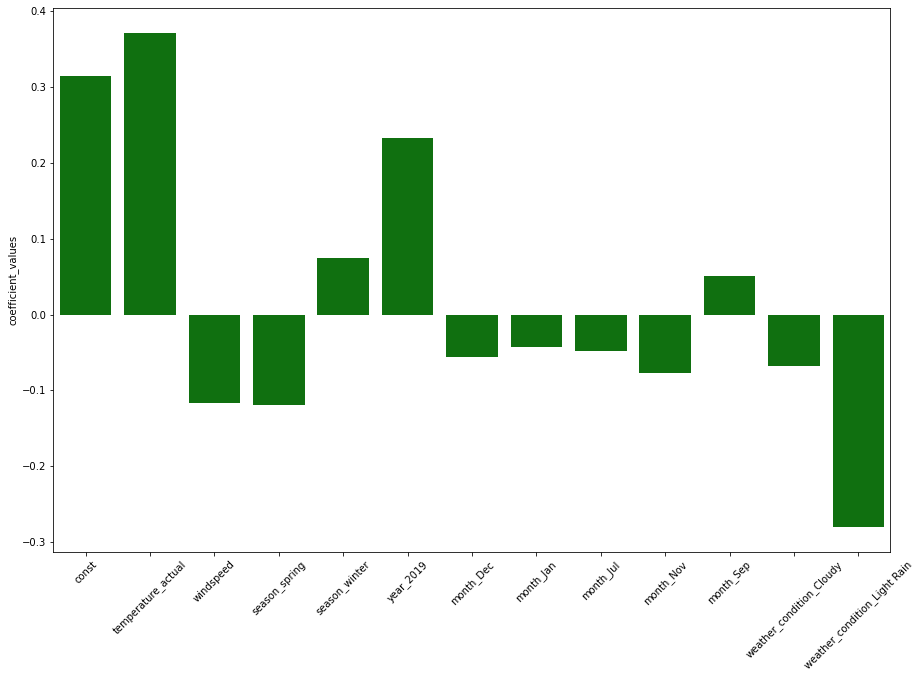

In [282]:
plt.figure(figsize = (15,10))
#coeff = pd.DataFrame(lr3.coef_, index = X_train_lm3.columns, columns = ['Coefficient'])
sns.barplot(x = model_lm3_coeff.index, y = 'coefficient_values', data =model_lm3_coeff , color = 'green')
plt.xticks(rotation=45)
plt.show()


### Insights
- From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**
    

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

-F-statistic:                     190.7
-Prob (F-statistic):          2.00e-177

The F-Statistics value of 190.7 and the p-value of '~0.0000' states that the overall model is significant

## The equation of best fitted surface based on model lr6:

cnt = 0.084143 + (**yr** × 0.230846) + (**workingday** × 0.043203) + (**temp** × 0.563615) − (**windspeed** × 0.155191) + (**season2** × 0.082706) + (**season4** ×0.128744) + (**mnth9** × 0.094743) + (**weekday6** ×0.056909) − (**weathersit2** × 0.074807) − (**weathersit3** × 0.306992)



  

## Interpretation of Coefficients:
**temp:** A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units.

**weathersit_3:** A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3070 units.

**yr:** A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.

**season_4:** A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

**windspeed:** A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

**workingday:** A coefficient value of ‘0.043203’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.043203 units.

**season_2:** A coefficient value of ‘0.082706’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units.

**mnth_9:** A coefficient value of ‘0.094743’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units.

**weekday_6:** A coefficient value of ‘0.056909’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.056909 units.

**weathersit_2:** A coefficient value of ‘-0.074807’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.

**const:** The Constant value of ‘0.084143’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units.

# ASSUMPTIONS 

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [246]:
y_train_pred = lr3.predict(X_train_lm3)

In [247]:
y_train_pred

524    0.777618
12     0.106289
161    0.589219
556    0.704190
502    0.733406
473    0.620947
722    0.417135
501    0.787764
159    0.564477
363    0.217086
409    0.439259
229    0.558474
78     0.260545
92     0.409869
690    0.651457
66     0.267683
693    0.530076
500    0.700407
435    0.502493
302    0.457370
668    0.610421
403    0.410747
395    0.461421
564    0.811700
649    0.745060
15     0.173880
401    0.484700
245    0.603028
497    0.751830
6      0.095275
362    0.190466
71     0.266708
434    0.464917
436    0.558811
374    0.444247
492    0.638138
104    0.429935
683    0.590093
516    0.786681
402    0.521959
90     0.280296
416    0.471257
375    0.377242
312    0.455008
218    0.583460
691    0.660423
283    0.522389
205    0.569316
364    0.239092
190    0.542787
460    0.658414
355    0.231636
194    0.492276
592    0.807697
132    0.409424
233    0.535183
173    0.497607
178    0.601928
706    0.581323
608    0.836427
206    0.549523
96     0.445178
627    0

Text(0.5, 0, 'Errors')

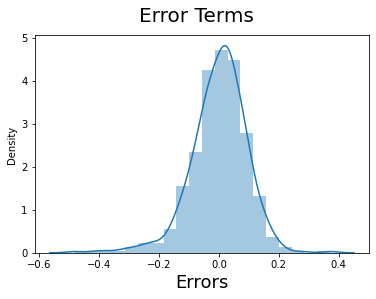

In [248]:
#y_train=y_train.flatten()
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

In [54]:
X_train_new.columns

Index(['temp', 'windspeed', 'season_spring', 'season_winter', 'year_2019',
       'month_Dec', 'month_Jan', 'month_Jul', 'month_Nov', 'month_Sep',
       'weather_condition_Cloudy', 'weather_condition_Light Rain'],
      dtype='object')

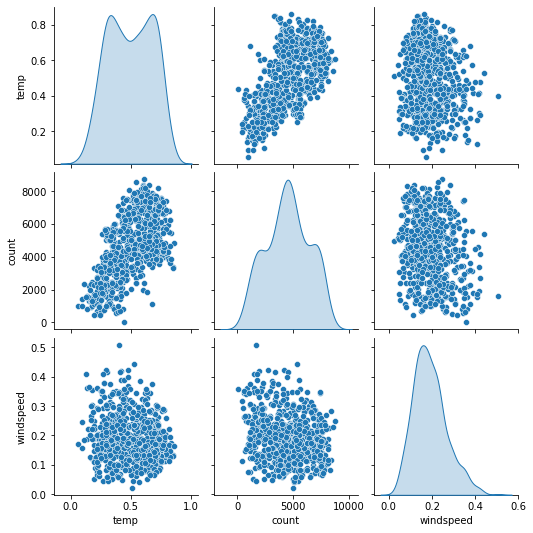

In [55]:
bike_new=df_bike_sharing[[  'temp', 'count','windspeed']]

sns.pairplot(bike_new, diag_kind='kde')
plt.show()

## Insight
- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.46
1,windspeed,3.99
3,season_winter,2.52
2,season_spring,2.32
4,year_2019,2.05
8,month_Nov,1.80
6,month_Jan,1.61
10,weather_condition_Cloudy,1.51
5,month_Dec,1.46
7,month_Jul,1.36


## Insight

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [57]:
df_test_dummies=pd.get_dummies(df_test,drop_first= True)
df_test_dummies.head()

,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_not_holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,working_day_workingday,weather_condition_Cloudy,weather_condition_Light Rain
196,0.686667,0.585000,0.208342,5923,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
187,0.750000,0.651250,0.159200,4592,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
14,0.233333,0.498750,0.157963,1248,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
31,0.192174,0.829565,0.053213,1360,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
390,0.341667,0.769583,0.073396,4075,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0


In [58]:
# Apply scaler() to all the numeric variables
num_feats=[ 'temp','humidity','windspeed','count']
#df_test[num_feats]= np.log(df_test_dummies[num_feats])
df_test[num_feats]= scaler.transform(df_test_dummies[num_feats])
df_test.head()

,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_not_holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,working_day_workingday,weather_condition_Cloudy,weather_condition_Light Rain
196,0.589714,0.649015,0.436975,0.691550,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
187,0.680622,0.737038,0.307644,0.535568,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
14,-0.061005,0.534419,0.304389,0.143677,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
31,-0.120085,0.973956,0.028710,0.156803,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
390,0.094499,0.894261,0.081826,0.474979,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0


In [59]:
y_test=df_test.pop('count')
X_test=df_test


In [62]:
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)
X_test_lm3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 196 to 235
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         220 non-null    float64
 1   temp                          220 non-null    float64
 2   windspeed                     220 non-null    float64
 3   season_spring                 220 non-null    uint8  
 4   season_winter                 220 non-null    uint8  
 5   year_2019                     220 non-null    uint8  
 6   month_Dec                     220 non-null    uint8  
 7   month_Jan                     220 non-null    uint8  
 8   month_Jul                     220 non-null    uint8  
 9   month_Nov                     220 non-null    uint8  
 10  month_Sep                     220 non-null    uint8  
 11  weather_condition_Cloudy      220 non-null    uint8  
 12  weather_condition_Light Rain  220 non-null    uint8  
dtypes: 

In [63]:
y_pred = lr3.predict(X_test_lm3)

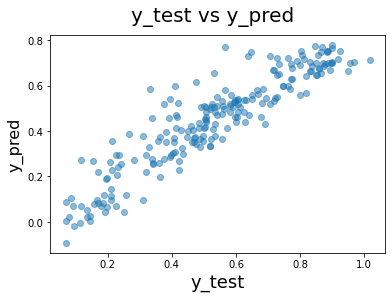

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [65]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.7236854108103234

## Adjusted R^2 Value for TEST

In [66]:
# Get the shape of X_test
X_test.shape


(220, 12)

In [67]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7076671737558495

In [68]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred)))
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

0.00879620369604744
0.01566197209418441
0.09378807864567563
0.12514780099619974


In [69]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8212671723311353
0.7236854108103234


In [73]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train_lm3, y_train, scoring='r2',
                         cv=cv, n_jobs=-1)
print(scores)

#view mean absolute of accuracy score.
np.mean(np.absolute(scores))



[0.76557792 0.79013575 0.83365648 0.76209841 0.87229336]


0.8047523851730489

# Final Result Comparison

- Train R^2 :0.824
- Train Adjusted R^2 :0.821 
- Test R^2 :0.820
- Test Adjusted R^2 :0.812 
- This seems to be a really good model that can very well 'Generalize' various datasets.

# FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units. 
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.
- **Year (yr)** - A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **season_4:** - A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units. 
- **windspeed:** - A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units. 

 #### NOTE: 
 - The details of weathersit_1 & weathersit_3 
 - **weathersit_1:** Clear, Few clouds, Partly cloudy, Partly cloudy
 - **weathersit_3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
 
 
 The details of season1 & season4 
 - **season1:** spring 
 - **season4:** winter